# Graduation Admission 

In [1]:
#import required libraries for EDA and feature Engineer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option("display.max_columns", None)

# EDA Operations

Loading the required dataset


checking the shape and name of columns


valiating duplicate and Nan values in the dataset

data and data type validation

# Lets create some important functions for data analysis

Function for missing value calculator

In [2]:
def missing_values(df):
    total_null = df.isnull().sum()
    percentage = ((df.isnull().sum()/df.isnull().count())*100)
    print("Total Records: ", df.shape[0])
    
    missing_values_table = pd.concat([total_null, percentage], axis=1, keys=["Total Missing Value" , "Percentage"])
    return missing_values_table

For understanding categorical feature we will use bar plots and pie charts 

In [3]:
def category_analysis(df, colnames , nrows= 2, mcolumns= 2, width = 20, height= 30 , sortbyindex=False):
    fig, ax = plt.subplots(nrows, mcolumns, figsize= (width, height))
    
    string = "Frequence of"
    rows = 0
    for column in colnames:
        count = (df[column].value_counts(normalize = True)*100)
        string = string + column + "in %"
        
        if sortbyindex:
            count = count.sort_index()
            
        count.plot.bar(ax = ax[rows][0])
        ax[rows][0].set_ylabel(string)
        ax[rows][0].set_xlabel(column)
        count.plot.pie(ax= ax[rows][1], autopct='%0.0f%%' )
        
        string = "Frequesnce of"
        rows += 1
        
        
    
    

We will create a function for oulier detection

In [4]:
def find_outliers(df, colnames, nrows=2, mcol=2, width= 20, height = 30):
    fig, ax = plt.subplots(nrows, mcol, figsize= (width, height))
    fig.set_facecolor("Lightgrey")
    rows = 0
    
    for columns in colnames:
        ax[rows][0].set_title("Box Plot for oulier detection")
        plt.ylabel(columns)
        sns.boxplot(df[columns], ax= ax[rows][0])
        
        ax[rows][1].set_title("Skewness checking for outliers")
        ax[rows][1].set_ylabel(columns)
        ax[rows][1].axvline(df[columns].mean(), linestyle= "--")
        ax[rows][1].axvline(df[columns].median(), linestyle= "-")
        ax[rows][1].axvline(df[columns].mode()[0], linestyle= "--")
        sns.distplot(df[columns], ax= ax[rows][1])
        
        rows +=1
    plt.show()
        

Box plot for categorical Veriables

In [5]:
def cat_boxplot(colnames, y):
    fig = plt.figure(figsize=(20, 15))
 #   fig.set_facecolor("grey")
    
    for col in colnames:
        plt.subplot(2,2,colnames.index(col)+1)
        sns.boxplot(x= col, y = y ,data=data )
        plt.title("box plot of" +col)
        
    plt.show()
        

How write a function for varience inflation factor (VIF)

In [6]:
def cal_vif(X_train):
        vif = pd.DataFrame()
        X = X_train
        vif['feartures'] = X.columns
        vif['VIF'] = [varience_inflation_factor(X.values, i) for i in range(x.spape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by ="VIF", ascending = False)
        
        return vif

In [7]:
# Load the data set and check shape, columns and duplicated items in data set

In [8]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
data.shape

(500, 9)

In [10]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
#White spaces present at some data names. Rename such datasets
data.rename(columns={'LOR ':'LOR','Chance of Admit ':"Chance of Admit" }, inplace=True)

In [12]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
#Removing unwanted columns
data.drop("Serial No.", axis = 1, inplace=True)

In [14]:
#Check the duplicates present in data set
data.duplicated().sum()

0

data has no duplicated values

In [15]:
#Checke the missing values present in data set
missing_values(data).head()

Total Records:  500


,Total Missing Value,Percentage
GRE Score,0,0.0
TOEFL Score,0,0.0
University Rating,0,0.0
SOP,0,0.0
LOR,0,0.0


Nice! There is no any missing values present in the data

In [16]:
data.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [17]:
Discrete_functions = [feature for feature in data.columns if len(data[feature].unique()) <= 15]
#we are considering the features which has less than 15 unique values are the discrete functions
#We can tret it as a category veriables
Discrete_functions

['University Rating', 'SOP', 'LOR', 'Research']

In [18]:
conti_function = [feature for feature in data.columns if len(data[feature].unique()) > 15]
#we are asuming the features which has more than 15 unique values are continuous functions
#We can tret it as a numerical functions
conti_function

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


we will convert data type discrete functions into category

In [20]:
data["University Rating"] = data["University Rating"].astype("category")
data["SOP"] = data["SOP"].astype("category")
data["LOR"] = data["LOR"].astype("category")
data["Research"] = data["Research"].astype("category")

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 18.8 KB


In [22]:
data.describe()

,GRE Score,TOEFL Score,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,8.576440,0.72174
std,11.295148,6.081868,0.604813,0.14114
min,290.000000,92.000000,6.800000,0.34000
25%,308.000000,103.000000,8.127500,0.63000
50%,317.000000,107.000000,8.560000,0.72000
75%,325.000000,112.000000,9.040000,0.82000
max,340.000000,120.000000,9.920000,0.97000


In [23]:
data.describe(include=["object", "category"]).T

,count,unique,top,freq
University Rating,500.0,5.0,3.0,162.0
SOP,500.0,9.0,4.0,89.0
LOR,500.0,9.0,3.0,99.0
Research,500.0,2.0,1.0,280.0


In [24]:
# we will check the outliers in continuous veriables mens numerical variables
conti_function

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

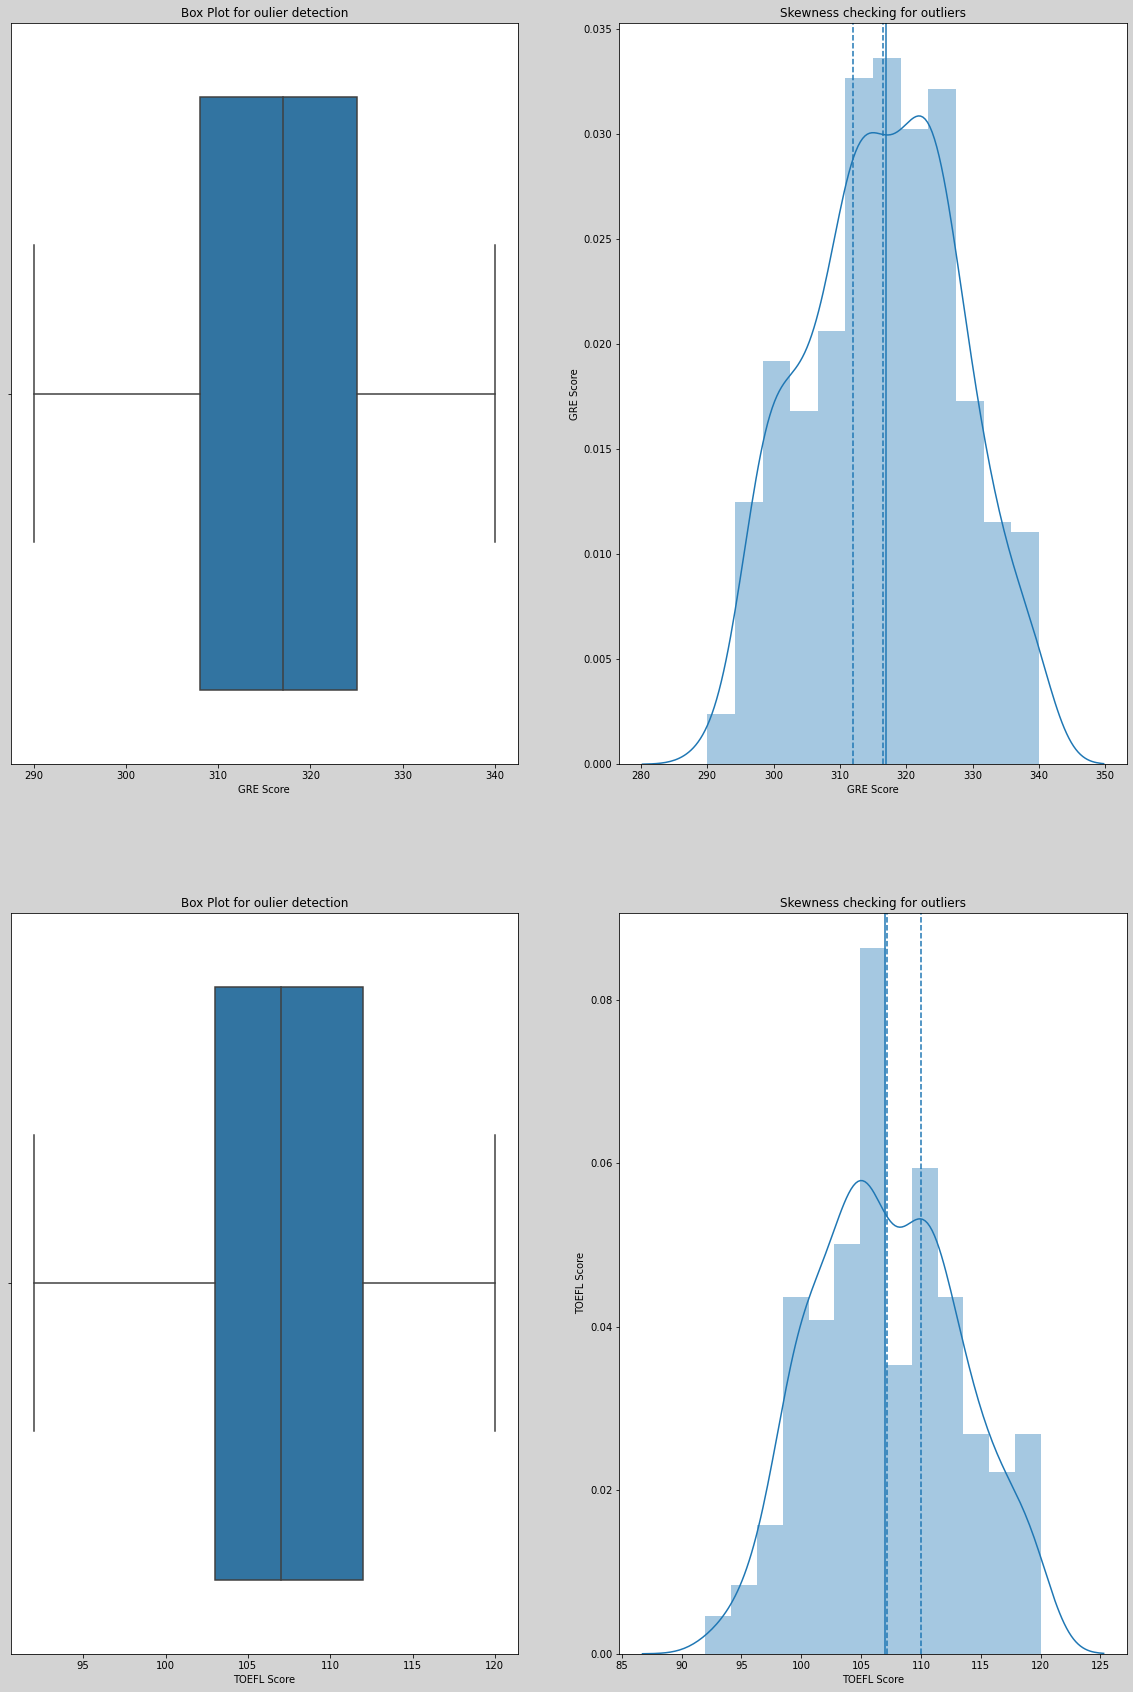

In [25]:
find_outliers(data, conti_function[0:2])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

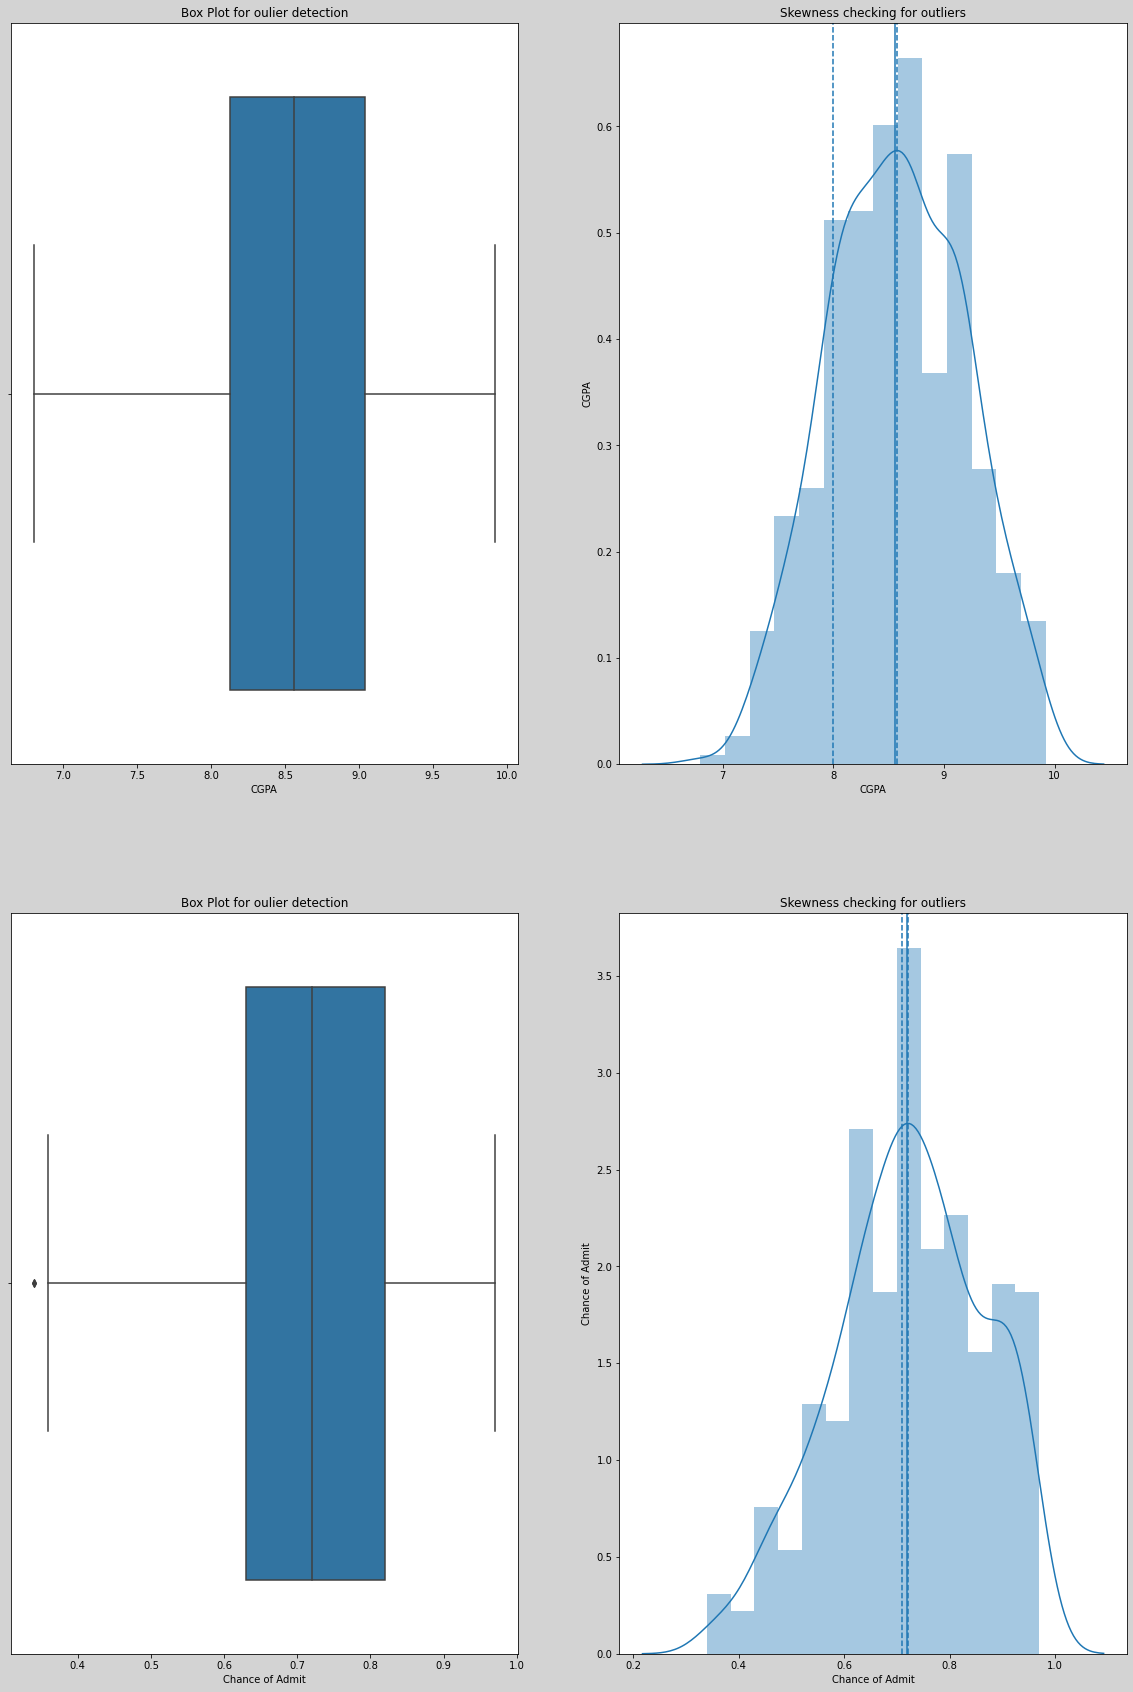

In [26]:
find_outliers(data, conti_function[2:len(conti_function)])

In [27]:
#Here we dont have outleirs present in the data hence no need to handle
#Change of admit is little bit left screwed hence we dont have to change it

In [28]:
Discrete_functions

['University Rating', 'SOP', 'LOR', 'Research']

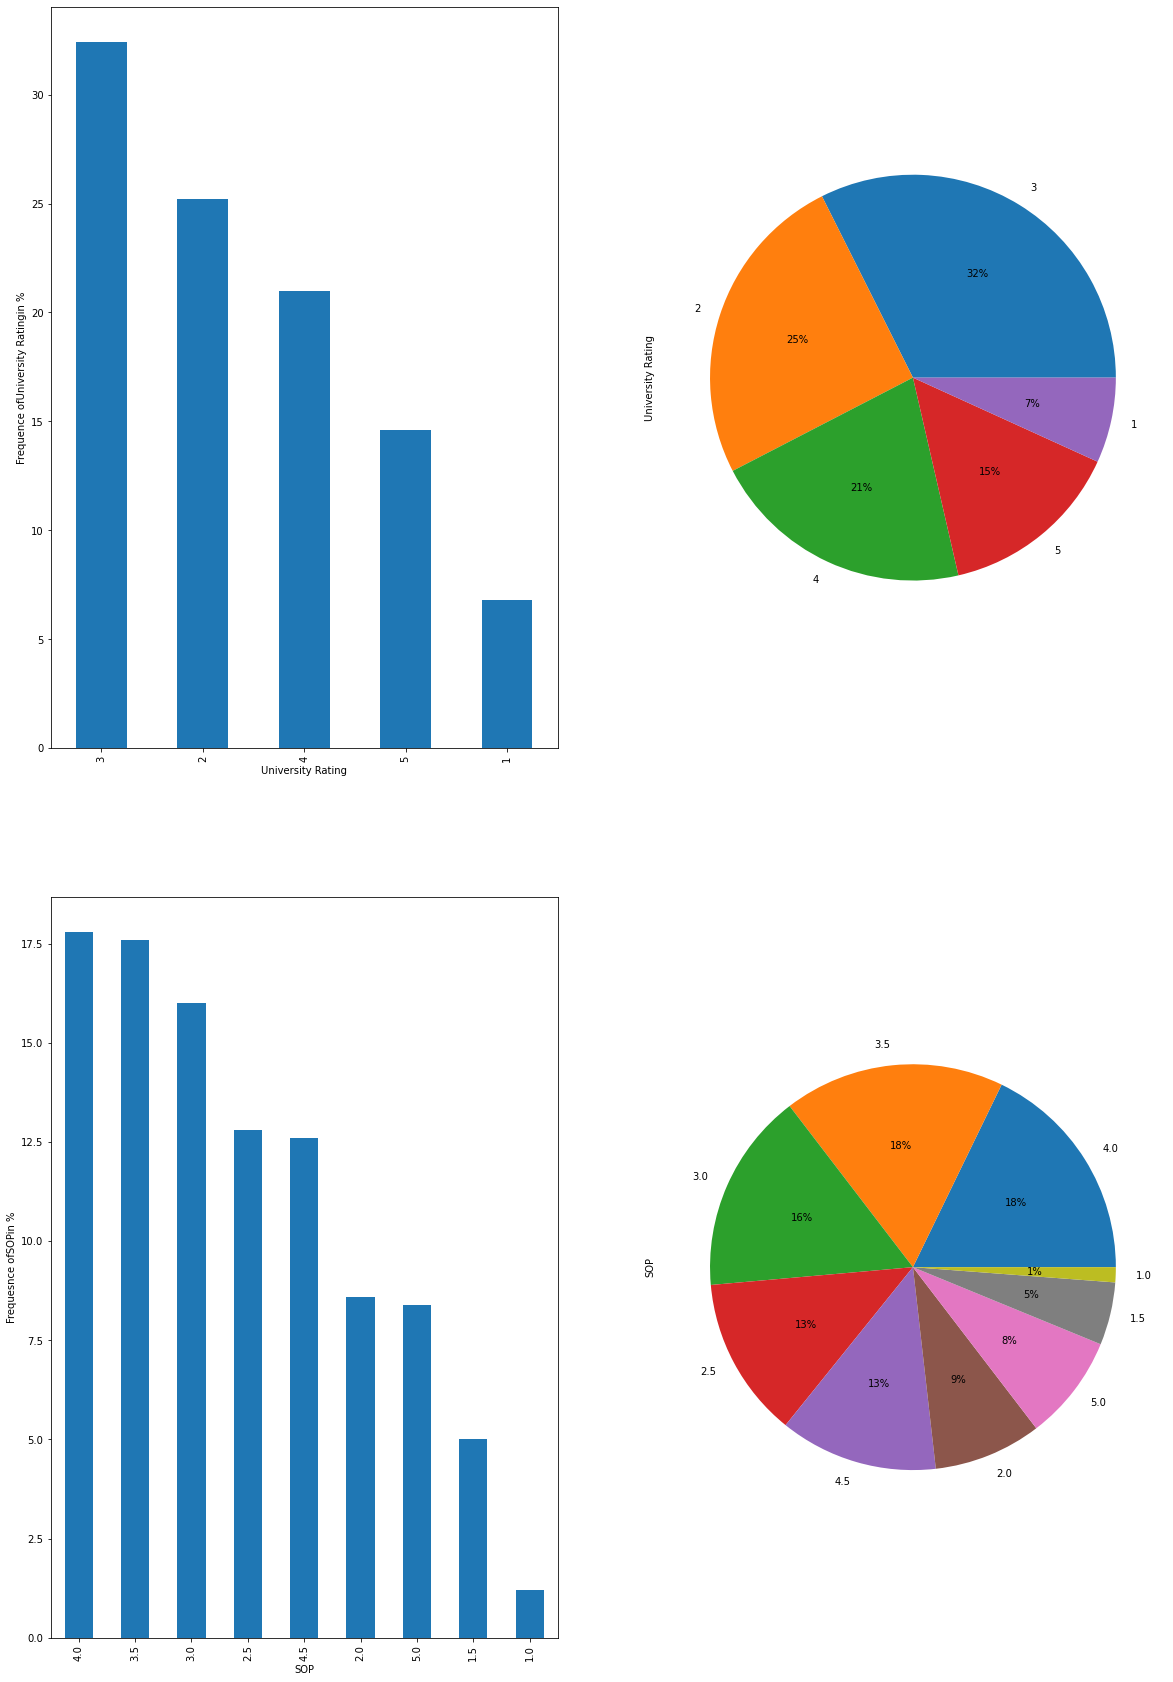

In [29]:
category_analysis(data, Discrete_functions[0:2])

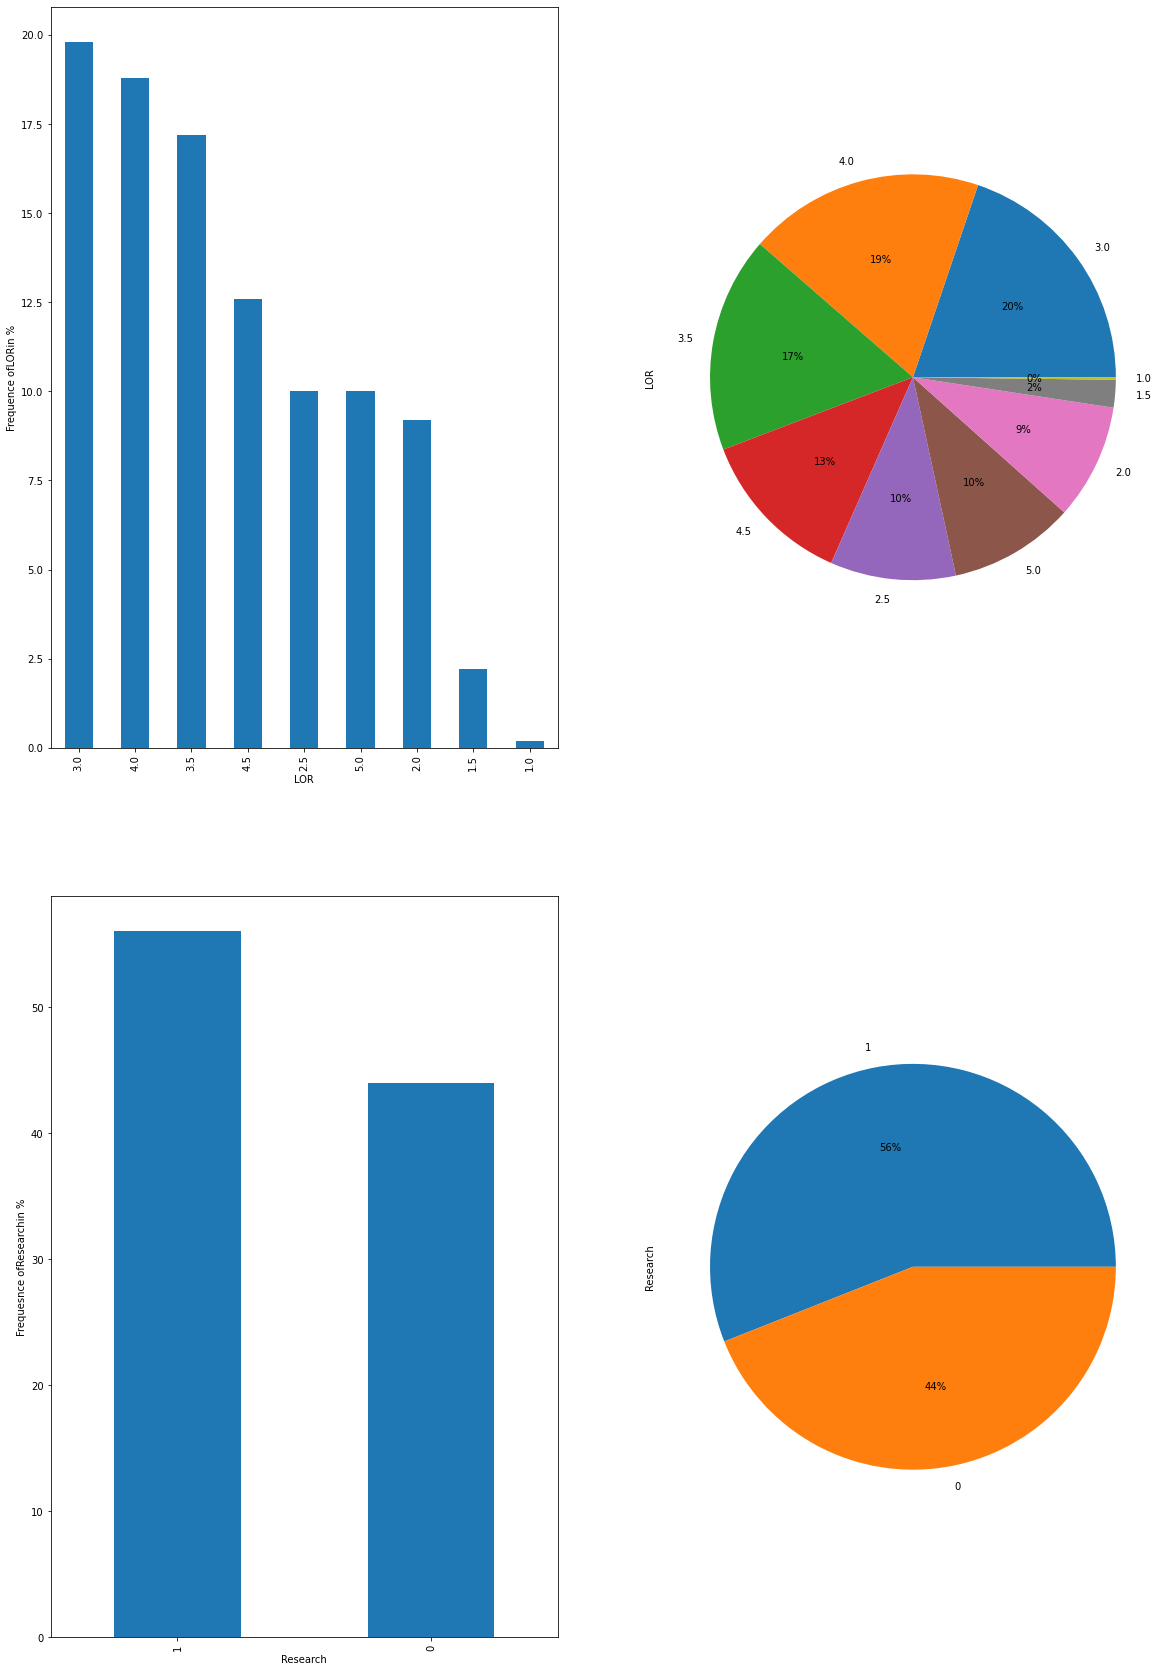

In [30]:
category_analysis(data, Discrete_functions[2:len(Discrete_functions)])

1. More then 50% of student have rating 3 and 4
2. Most of the LOR rating are in between 3.5 to 4.0

# Bivariate Analysis

It is a simple statistical analysis performed to understand emperical relation ships between 2 veriables


In [31]:
#Numerical Variables:
#we will compare numerical veriables with the Chance of admit
conti_function    

['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

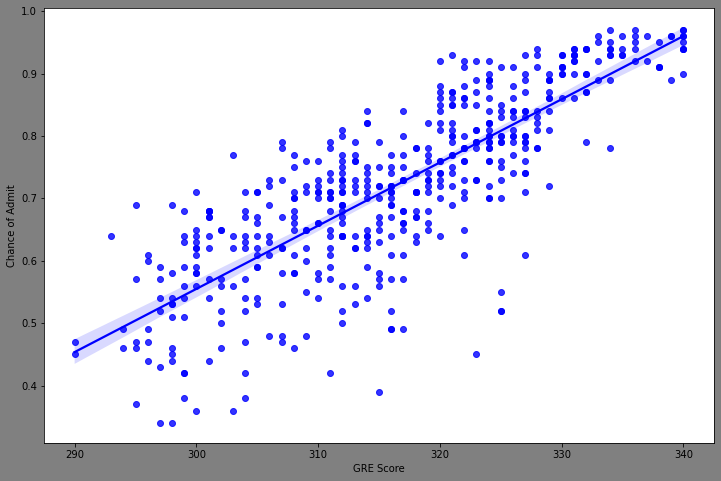

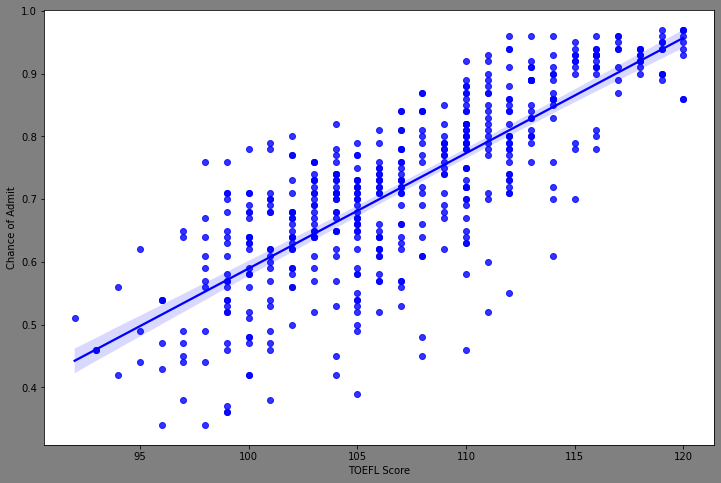

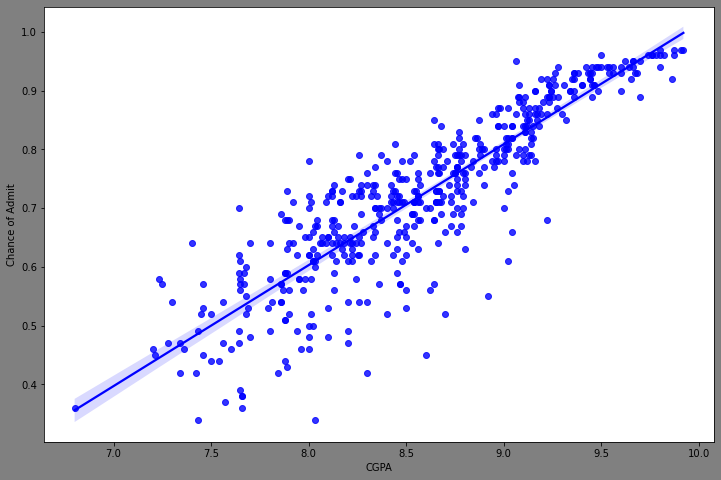

In [32]:
fig = plt.figure(figsize=(12, 8))
fig.set_facecolor(color= "grey")
sns.regplot(x= 'GRE Score', y= 'Chance of Admit', color = "b", data = data)

fig = plt.figure(figsize = (12, 8))
fig.set_facecolor(color = "grey")
sns.regplot(x= 'TOEFL Score', y= 'Chance of Admit', color= "b", data= data)

fig = plt.figure(figsize = (12,8))
fig.set_facecolor(color= 'grey')
sns.regplot(x=  'CGPA', y= 'Chance of Admit', color = "b", data = data)

In [33]:
#For Categorical features
Discrete_functions

['University Rating', 'SOP', 'LOR', 'Research']

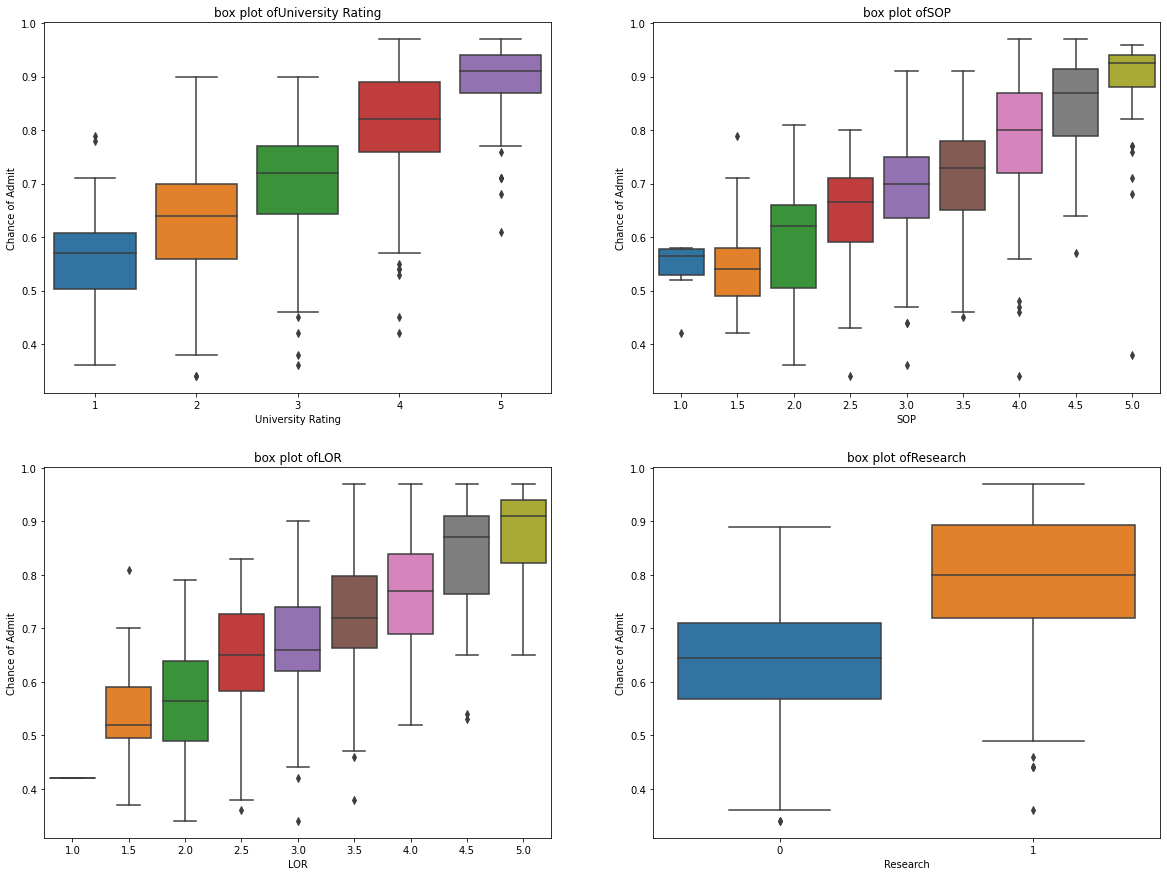

In [34]:
cat_boxplot(Discrete_functions, 'Chance of Admit')

observations:

1. higher the CGPA, TOFEL score, GRE score higher the chance of admission

2. higher the university rating or higher the SOP and LOR grades higher is the chance of admit

# Corelation Analysis

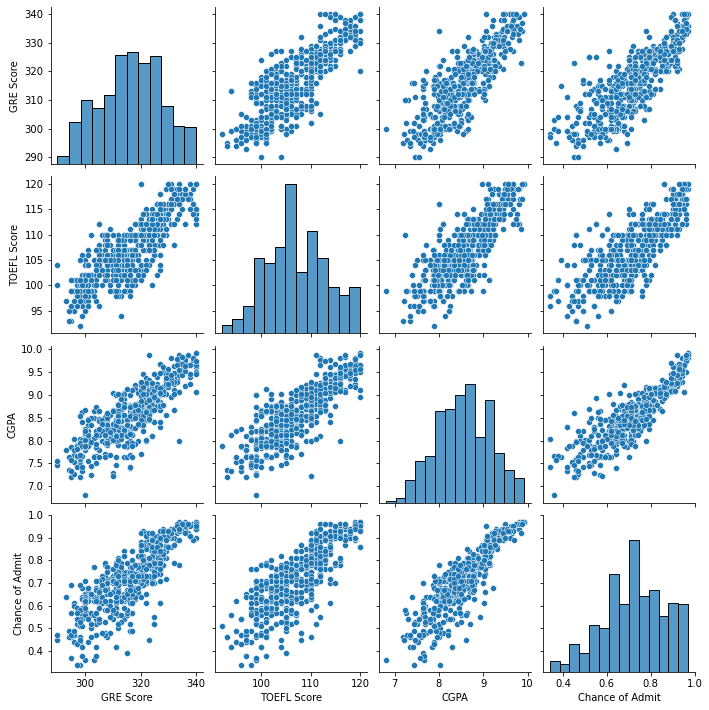

In [35]:
sns.pairplot(data)

All the numerical veriables have positive relationship with Chance of Admit

In [36]:
#Lets check the multicoliearity

<AxesSubplot:>

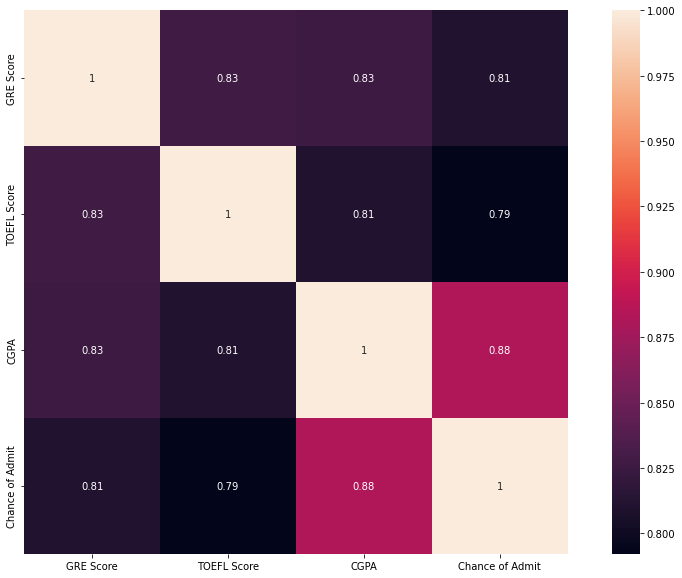

In [37]:
plt.figure(figsize= (16, 10))
sns.heatmap(data.corr(), square=True, annot=True)

Observation: Numerical columns are highly corelated with the chance of admit and it is more than 0.8 hence we can drop 2 columns out of these

Hence we will drop 2 columns (TOEFL Score and CGPA) and we will create a new data frame with significat features

In [38]:
significant_features = ['GRE Score', 'University Rating', 'SOP', 'LOR', 'Research', 'Chance of Admit']
sig_edu_data = data[significant_features]
sig_edu_data.head()

,GRE Score,University Rating,SOP,LOR,Research,Chance of Admit
0,337,4,4.5,4.5,1,0.92
1,324,4,4.0,4.5,1,0.76
2,316,3,3.0,3.5,1,0.72
3,322,3,3.5,2.5,1,0.80
4,314,2,2.0,3.0,0,0.65


In [39]:
sig_edu_data.shape

(500, 6)

Lets work on categorical features and creat dummies

In [40]:
sig_cat_columns = ["University Rating","SOP", "LOR" ]
sig_cat_dum = pd.get_dummies(sig_edu_data[sig_cat_columns], drop_first=True)
sig_cat_dum.shape

(500, 20)

In [41]:
sig_edu_data = pd.concat([sig_edu_data, sig_cat_dum], axis=1)

In [42]:
sig_edu_data.shape

(500, 26)

In [43]:
sig_edu_data.drop(sig_cat_columns, axis=1, inplace=True)
sig_edu_data.shape

(500, 23)

In [44]:
sig_edu_data.head()

,GRE Score,Research,Chance of Admit,University Rating_2,University Rating_3,University Rating_4,University Rating_5,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,SOP_4.5,SOP_5.0,LOR_1.5,LOR_2.0,LOR_2.5,LOR_3.0,LOR_3.5,LOR_4.0,LOR_4.5,LOR_5.0
0,337,1,0.92,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,324,1,0.76,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,316,1,0.72,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,322,1,0.80,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,314,0,0.65,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [45]:
#Import Required modules from Sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Prepare train and test dataset

In [46]:
df_train, df_test = train_test_split(sig_edu_data, train_size=0.7, random_state=100)

In [47]:
print(df_train.shape)
print(df_test.shape)

(350, 23)
(150, 23)


In [48]:
sig_edu_data

,GRE Score,Research,Chance of Admit,University Rating_2,University Rating_3,University Rating_4,University Rating_5,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,SOP_4.5,SOP_5.0,LOR_1.5,LOR_2.0,LOR_2.5,LOR_3.0,LOR_3.5,LOR_4.0,LOR_4.5,LOR_5.0
0,337,1,0.92,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,324,1,0.76,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,316,1,0.72,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,322,1,0.80,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,314,0,0.65,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,332,1,0.87,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
496,337,1,0.96,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
497,330,1,0.93,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
498,312,0,0.73,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [49]:
df_train.columns

Index(['GRE Score', 'Research', 'Chance of Admit', 'University Rating_2',
       'University Rating_3', 'University Rating_4', 'University Rating_5',
       'SOP_1.5', 'SOP_2.0', 'SOP_2.5', 'SOP_3.0', 'SOP_3.5', 'SOP_4.0',
       'SOP_4.5', 'SOP_5.0', 'LOR_1.5', 'LOR_2.0', 'LOR_2.5', 'LOR_3.0',
       'LOR_3.5', 'LOR_4.0', 'LOR_4.5', 'LOR_5.0'],
      dtype='object')

As the data present in the data set have various ranges hence it always be good the standerdize or normalize our data

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Applying it only to the numerical columns
num_col = ["GRE Score","Chance of Admit" ]

df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_train.head()

,GRE Score,Research,Chance of Admit,University Rating_2,University Rating_3,University Rating_4,University Rating_5,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,SOP_4.5,SOP_5.0,LOR_1.5,LOR_2.0,LOR_2.5,LOR_3.0,LOR_3.5,LOR_4.0,LOR_4.5,LOR_5.0
153,0.664269,0,0.483718,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
84,2.084080,1,1.557510,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
310,0.309316,1,0.268959,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
494,-1.376710,1,-0.303730,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
126,0.575531,1,0.913235,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [51]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,350.0,-1.711647e-15,1.001432,-2.352830,-0.755543,-0.045637,0.664269,2.084080
Chance of Admit,350.0,-7.448010e-16,1.001432,-2.737658,-0.661660,-0.017385,0.698476,1.772268
University Rating_2,350.0,2.542857e-01,0.436082,0.000000,0.000000,0.000000,1.000000,1.000000
University Rating_3,350.0,3.142857e-01,0.464895,0.000000,0.000000,0.000000,1.000000,1.000000
University Rating_4,350.0,2.285714e-01,0.420514,0.000000,0.000000,0.000000,0.000000,1.000000
University Rating_5,350.0,1.342857e-01,0.341447,0.000000,0.000000,0.000000,0.000000,1.000000
SOP_1.5,350.0,4.857143e-02,0.215278,0.000000,0.000000,0.000000,0.000000,1.000000
SOP_2.0,350.0,7.714286e-02,0.267200,0.000000,0.000000,0.000000,0.000000,1.000000
SOP_2.5,350.0,1.285714e-01,0.335204,0.000000,0.000000,0.000000,0.000000,1.000000
SOP_3.0,350.0,1.742857e-01,0.379898,0.000000,0.000000,0.000000,0.000000,1.000000


In [52]:
#check the colinearaty in the columns
df_train.columns

Index(['GRE Score', 'Research', 'Chance of Admit', 'University Rating_2',
       'University Rating_3', 'University Rating_4', 'University Rating_5',
       'SOP_1.5', 'SOP_2.0', 'SOP_2.5', 'SOP_3.0', 'SOP_3.5', 'SOP_4.0',
       'SOP_4.5', 'SOP_5.0', 'LOR_1.5', 'LOR_2.0', 'LOR_2.5', 'LOR_3.0',
       'LOR_3.5', 'LOR_4.0', 'LOR_4.5', 'LOR_5.0'],
      dtype='object')

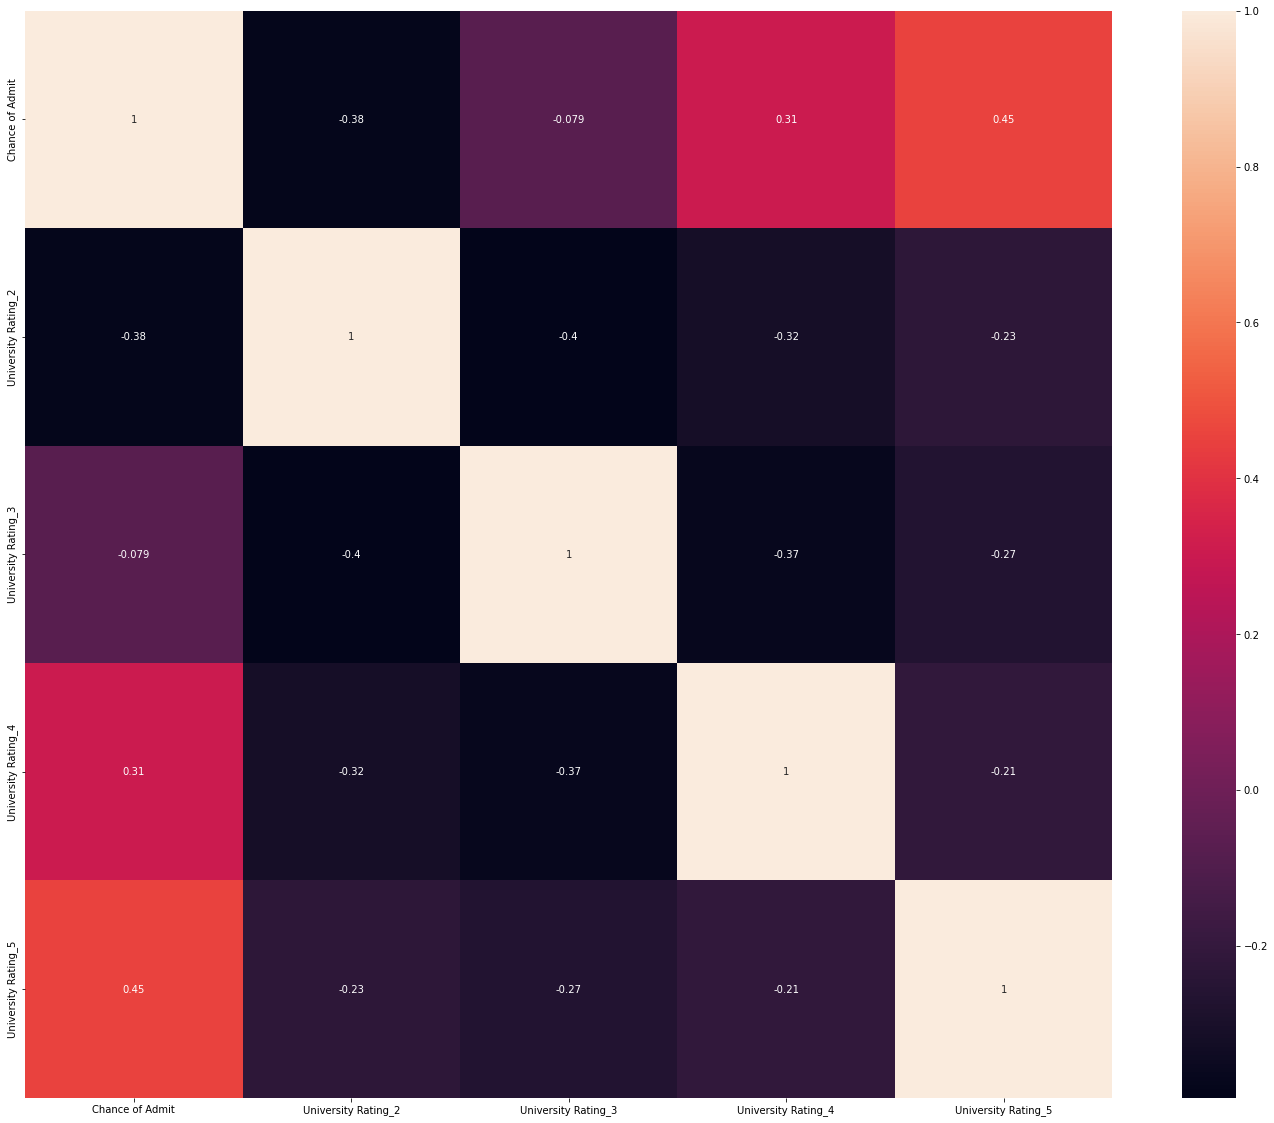

In [53]:
features = ['Chance of Admit', 'University Rating_2','University Rating_3', 'University Rating_4', 'University Rating_5']
dataset = df_train[features]
plt.figure(figsize=(25,20))
sns.heatmap(dataset.corr(),square=True, annot=True )
plt.show()

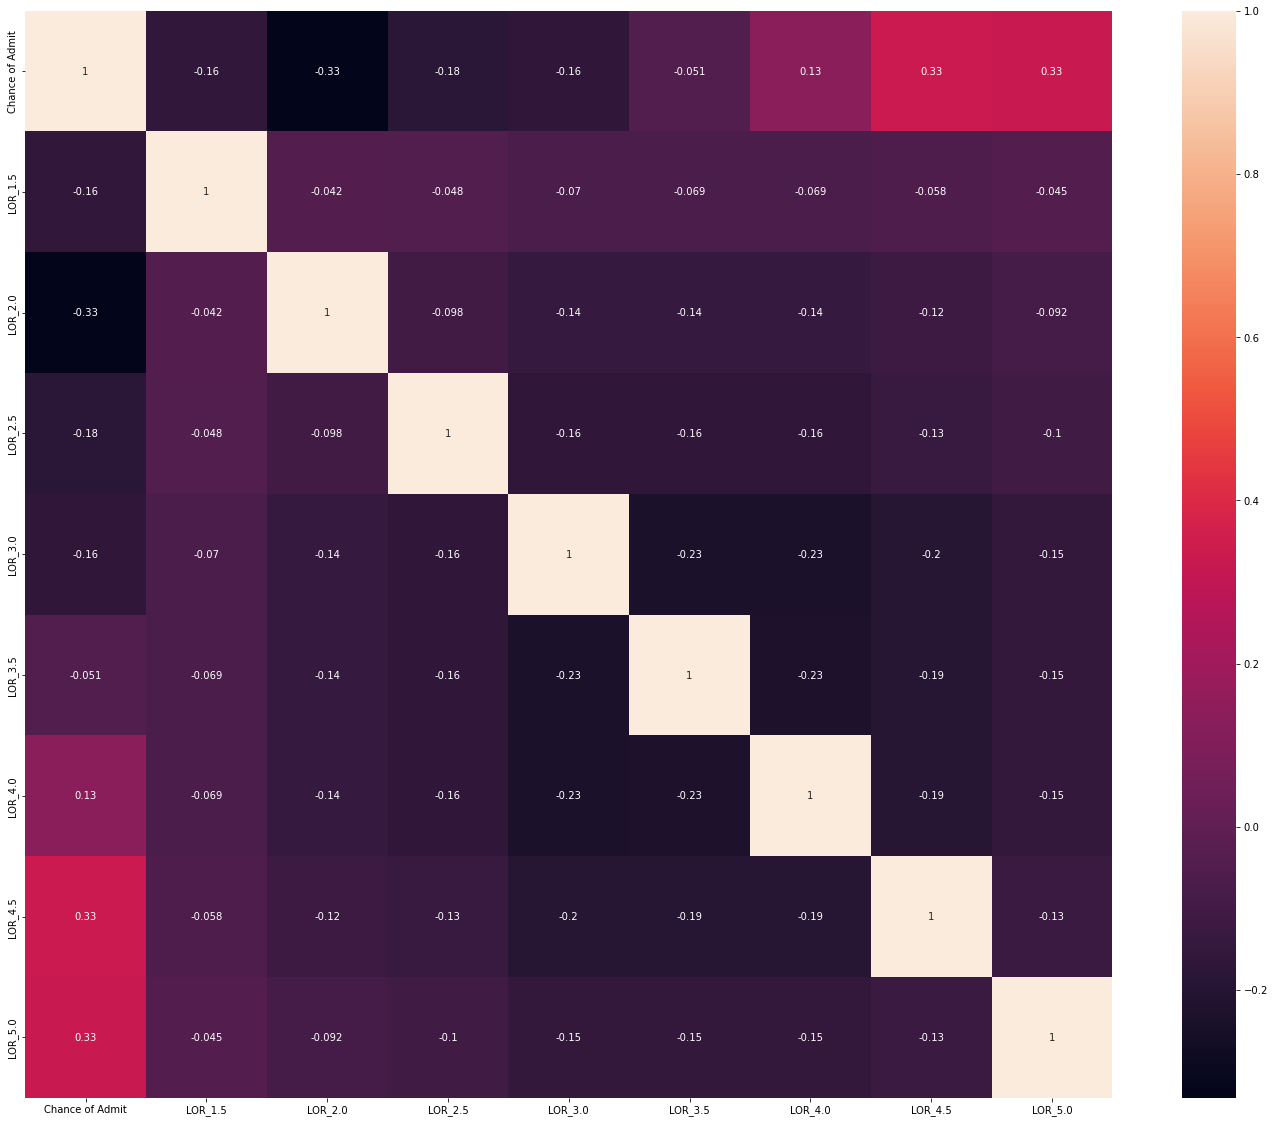

In [54]:
dataset_1 = df_train[['Chance of Admit','LOR_1.5', 'LOR_2.0', 'LOR_2.5', 'LOR_3.0', 'LOR_3.5', 'LOR_4.0', 'LOR_4.5', 'LOR_5.0' ]]
plt.figure(figsize=(25,20))
sns.heatmap(dataset_1.corr(), annot=True, square=True)
plt.show()

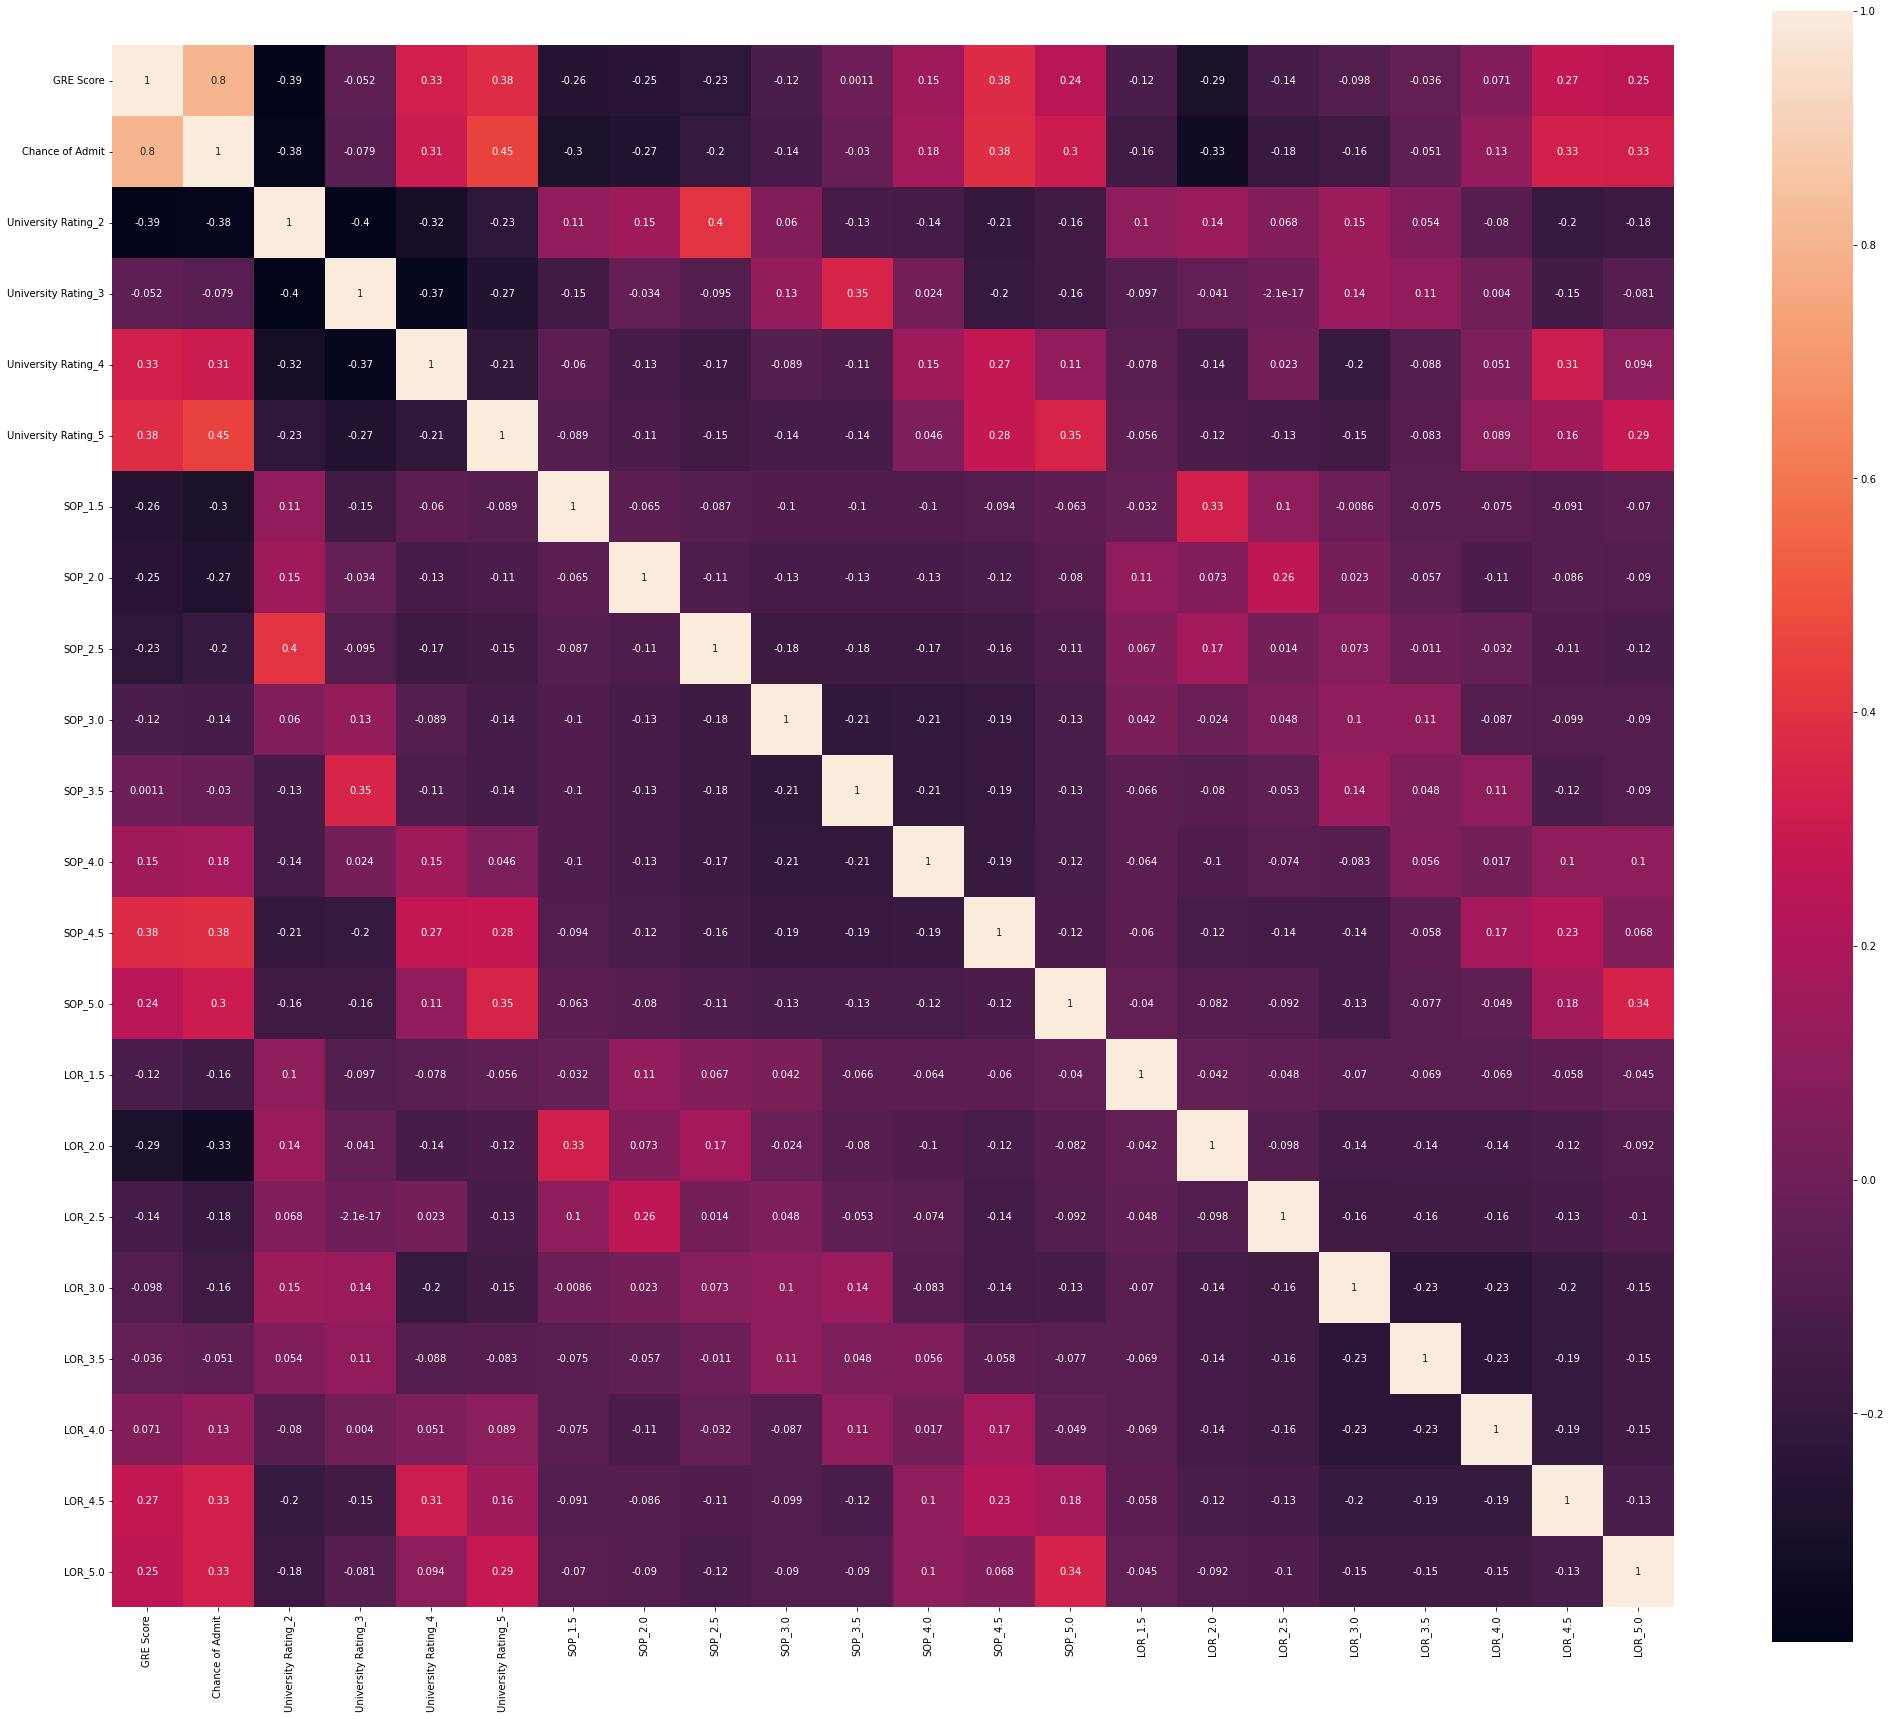

In [55]:
dataset_2 = df_train[['GRE Score', 'Research', 'Chance of Admit', 'University Rating_2',
       'University Rating_3', 'University Rating_4', 'University Rating_5',
       'SOP_1.5', 'SOP_2.0', 'SOP_2.5', 'SOP_3.0', 'SOP_3.5', 'SOP_4.0',
       'SOP_4.5', 'SOP_5.0', 'LOR_1.5', 'LOR_2.0', 'LOR_2.5', 'LOR_3.0',
       'LOR_3.5', 'LOR_4.0', 'LOR_4.5', 'LOR_5.0']]

plt.figure(figsize=(35,30))
sns.heatmap(dataset_2.corr(), annot=True, square=True)
plt.show()

Observation: Here we can see that feartures are not highly correlated with each other

# Training the model

Using Backword Elimination for feature engineering.

In [56]:
df_train.head

<bound method NDFrame.head of      GRE Score Research  Chance of Admit  University Rating_2  \
153   0.664269        0         0.483718                    0   
84    2.084080        1         1.557510                    0   
310   0.309316        1         0.268959                    0   
494  -1.376710        1        -0.303730                    0   
126   0.575531        1         0.913235                    0   
..         ...      ...              ...                  ...   
343  -1.021757        0        -0.948005                    1   
359   0.398054        0         0.626890                    1   
323  -1.021757        0        -0.733247                    1   
280  -0.489328        1        -0.303730                    0   
8    -1.287972        0        -1.592280                    0   

     University Rating_3  University Rating_4  University Rating_5  SOP_1.5  \
153                    1                    0                    0        0   
84                     0       

In [57]:
y_train = df_train.pop('Chance of Admit')

In [58]:
X_train = df_train

In [59]:
print(y_train.shape)
print(X_train.shape)

(350,)
(350, 22)


In [60]:
X_train.columns

Index(['GRE Score', 'Research', 'University Rating_2', 'University Rating_3',
       'University Rating_4', 'University Rating_5', 'SOP_1.5', 'SOP_2.0',
       'SOP_2.5', 'SOP_3.0', 'SOP_3.5', 'SOP_4.0', 'SOP_4.5', 'SOP_5.0',
       'LOR_1.5', 'LOR_2.0', 'LOR_2.5', 'LOR_3.0', 'LOR_3.5', 'LOR_4.0',
       'LOR_4.5', 'LOR_5.0'],
      dtype='object')

In [61]:
X_train_1 = X_train[['GRE Score', 'Research', 'University Rating_2',
       'University Rating_3', 'University Rating_4', 'University Rating_5',
       'SOP_1.5', 'SOP_2.0', 'SOP_2.5', 'SOP_3.0', 'SOP_3.5', 'SOP_4.0',
       'SOP_4.5', 'SOP_5.0', 'LOR_1.5', 'LOR_2.0', 'LOR_2.5', 'LOR_3.0',
       'LOR_3.5', 'LOR_4.0', 'LOR_4.5', 'LOR_5.0']]

from statsmodels import tools as sm

X_train_1 = sm.add_constant(X_train_1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [62]:
from statsmodels.regression import linear_model
lr_1 = linear_model.OLS(y_train, X_train_1).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     42.08
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.11e-81
Time:                        20:20:42   Log-Likelihood:                -261.59
No. Observations:                 350   AIC:                             569.2
Df Residuals:                     327   BIC:                             657.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3717      0.533     -2.575      0.010      -2.420      -0.324
GRE Score               0.5104      0.043     11.995      0.000       0.427       0.594
Research                0.1533      0.071      2.172      0.031       0.014       0.292
University Rating_2     0.0750      0.138      0.544      0.587      -0.196       0.346
University Rating_3     0.1298      0.146      0.892      0.373      -0.157       0.416
University Rating_4     0.1781      0.163      1.092      0.275      -0.143       0.499
University Rating_5     0.4388      0.181      2.428      0.016       0.083       0.794
SOP_1.5                -0.0281      0.420     -0.067      0.947      -0.855       0.799
SOP_2.0                 0.0947      0.410      0.231      0.818      -0.713       0.902
SOP_2.5                 0.3224      0.416      0.775      0.439      -0.496       1.141
SOP_3.0                 0.2526      0.413      0.612      0.541      -0.560       1.065
SOP_3.5                 0.2819      0.418      0.674      0.501      -0.541       1.104
SOP_4.0                 0.3772      0.421      0.895      0.371      -0.452       1.206
SOP_4.5                 0.4731      0.427      1.107      0.269      -0.368       1.314
SOP_5.0                 0.4953      0.437      1.133      0.258      -0.364       1.355
LOR_1.5                 0.4028      0.658      0.612      0.541      -0.892       1.698
LOR_2.0                 0.4516      0.667      0.677      0.499      -0.861       1.764
LOR_2.5                 0.6710      0.658      1.019      0.309      -0.624       1.966
LOR_3.0                 0.6789      0.663      1.024      0.307      -0.625       1.983
LOR_3.5                 0.7725      0.663      1.165      0.245      -0.532       2.077
LOR_4.0                 0.9193      0.664      1.384      0.167      -0.387       2.226
LOR_4.5                 1.0768      0.667      1.614      0.108      -0.236       2.389
LOR_5.0                 1.1767      0.671      1.754      0.080      -0.143       2.496
==============================================================================
Omnibus:                       56.599   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.858
Skew:                          -0.949   Prob(JB):                     4.16e-21
Kurtosis:                       4.683   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Square value is 0.739m

Acording to the P-values we can eliminate following values.
1. University Rating_2
2. SOP_1.5
3. LOR_1.5

In [63]:
X_train_2 = X_train[['GRE Score', 'Research', 'University Rating_3',
       'University Rating_4', 'University Rating_5', 'SOP_2.0',
       'SOP_2.5', 'SOP_3.0', 'SOP_3.5', 'SOP_4.0', 'SOP_4.5', 'SOP_5.0',
        'LOR_2.0', 'LOR_2.5', 'LOR_3.0', 'LOR_3.5', 'LOR_4.0',
       'LOR_4.5', 'LOR_5.0']]

X_train_2 = sm.add_constant(X_train_2)

lr_2 = linear_model.OLS(y_train, X_train_2).fit()
lr_2.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     49.01
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           4.93e-84
Time:                        20:20:42   Log-Likelihood:                -262.01
No. Observations:                 350   AIC:                             564.0
Df Residuals:                     330   BIC:                             641.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0296      0.220     -4.686      0.000      -1.462      -0.597
GRE Score               0.5123      0.042     12.105      0.000       0.429       0.596
Research                0.1514      0.070      2.160      0.031       0.014       0.289
University Rating_3     0.0632      0.085      0.745      0.457      -0.104       0.230
University Rating_4     0.1113      0.110      1.009      0.314      -0.106       0.328
University Rating_5     0.3712      0.134      2.765      0.006       0.107       0.635
SOP_2.0                 0.1547      0.160      0.969      0.333      -0.159       0.469
SOP_2.5                 0.3956      0.147      2.688      0.008       0.106       0.685
SOP_3.0                 0.3199      0.151      2.122      0.035       0.023       0.616
SOP_3.5                 0.3478      0.161      2.165      0.031       0.032       0.664
SOP_4.0                 0.4451      0.165      2.697      0.007       0.120       0.770
SOP_4.5                 0.5399      0.179      3.011      0.003       0.187       0.893
SOP_5.0                 0.5624      0.201      2.791      0.006       0.166       0.959
LOR_2.0                 0.1090      0.213      0.511      0.609      -0.310       0.528
LOR_2.5                 0.3347      0.211      1.587      0.114      -0.080       0.750
LOR_3.0                 0.3375      0.203      1.664      0.097      -0.062       0.737
LOR_3.5                 0.4310      0.205      2.099      0.037       0.027       0.835
LOR_4.0                 0.5777      0.209      2.766      0.006       0.167       0.989
LOR_4.5                 0.7351      0.219      3.358      0.001       0.304       1.166
LOR_5.0                 0.8345      0.230      3.631      0.000       0.382       1.287
==============================================================================
Omnibus:                       55.485   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.991
Skew:                          -0.932   Prob(JB):                     1.06e-20
Kurtosis:                       4.683   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-Squeared value is 0.738.
There is no much difference in the R suqared value

According the P_values we can remove following columns.

1. University Rating_3
2. SOP_2.0
3. LOR_2.0


In [64]:
X_train_3 = X_train[['GRE Score', 'Research',
       'University Rating_4', 'University Rating_5',
       'SOP_2.5', 'SOP_3.0', 'SOP_3.5', 'SOP_4.0', 'SOP_4.5', 'SOP_5.0',
        'LOR_2.5', 'LOR_3.0', 'LOR_3.5', 'LOR_4.0',
       'LOR_4.5', 'LOR_5.0']]

X_train_3 = sm.add_constant(X_train_3)

lr_3 = linear_model.OLS(y_train, X_train_3).fit()
lr_3.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     58.26
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           3.00e-86
Time:                        20:20:42   Log-Likelihood:                -263.04
No. Observations:                 350   AIC:                             560.1
Df Residuals:                     333   BIC:                             625.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.8549      0.119     -7.200      0.000      -1.088      -0.621
GRE Score               0.5190      0.042     12.437      0.000       0.437       0.601
Research                0.1513      0.070      2.169      0.031       0.014       0.288
University Rating_4     0.0600      0.091      0.660      0.510      -0.119       0.239
University Rating_5     0.3181      0.117      2.725      0.007       0.088       0.548
SOP_2.5                 0.3085      0.114      2.713      0.007       0.085       0.532
SOP_3.0                 0.2471      0.111      2.224      0.027       0.029       0.466
SOP_3.5                 0.2882      0.117      2.453      0.015       0.057       0.519
SOP_4.0                 0.3793      0.127      2.986      0.003       0.129       0.629
SOP_4.5                 0.4709      0.146      3.221      0.001       0.183       0.759
SOP_5.0                 0.4935      0.173      2.857      0.005       0.154       0.833
LOR_2.5                 0.2815      0.128      2.197      0.029       0.029       0.534
LOR_3.0                 0.2719      0.116      2.349      0.019       0.044       0.500
LOR_3.5                 0.3678      0.119      3.085      0.002       0.133       0.602
LOR_4.0                 0.5151      0.124      4.165      0.000       0.272       0.758
LOR_4.5                 0.6777      0.139      4.865      0.000       0.404       0.952
LOR_5.0                 0.7765      0.156      4.980      0.000       0.470       1.083
==============================================================================
Omnibus:                       51.284   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.226
Skew:                          -0.885   Prob(JB):                     1.40e-18
Kurtosis:                       4.584   Cond. No.                         14.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the p-values we can remove.

1. University Rating_4
2. SOP_3.0
3. LOR_2.5

In [65]:
X_train_4 = X_train[['GRE Score', 'Research','University Rating_5',
       'SOP_2.5','SOP_3.5', 'SOP_4.0', 'SOP_4.5', 'SOP_5.0','LOR_3.0', 'LOR_3.5', 'LOR_4.0','LOR_4.5', 'LOR_5.0']]

X_train_4 = sm.add_constant(X_train_4)

lr_4 = linear_model.OLS(y_train, X_train_4).fit()
lr_4.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     69.25
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           1.06e-86
Time:                        20:20:42   Log-Likelihood:                -268.65
No. Observations:                 350   AIC:                             565.3
Df Residuals:                     336   BIC:                             619.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.5747      0.082     -7.002      0.000      -0.736      -0.413
GRE Score               0.5531      0.041     13.647      0.000       0.473       0.633
Research                0.1543      0.070      2.203      0.028       0.017       0.292
University Rating_5     0.2655      0.099      2.683      0.008       0.071       0.460
SOP_2.5                 0.1418      0.095      1.497      0.135      -0.044       0.328
SOP_3.5                 0.1176      0.091      1.290      0.198      -0.062       0.297
SOP_4.0                 0.2139      0.098      2.179      0.030       0.021       0.407
SOP_4.5                 0.2943      0.115      2.567      0.011       0.069       0.520
SOP_5.0                 0.3222      0.148      2.177      0.030       0.031       0.613
LOR_3.0                 0.1683      0.094      1.793      0.074      -0.016       0.353
LOR_3.5                 0.2806      0.096      2.920      0.004       0.092       0.470
LOR_4.0                 0.4286      0.102      4.187      0.000       0.227       0.630
LOR_4.5                 0.5928      0.118      5.011      0.000       0.360       0.825
LOR_5.0                 0.6869      0.138      4.965      0.000       0.415       0.959
==============================================================================
Omnibus:                       45.710   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.468
Skew:                          -0.841   Prob(JB):                     2.24e-15
Kurtosis:                       4.342   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the p-values we can remove.

1. Research
2. SOP_2.5
3. SOP_3.5
4. LOR_3.0

In [66]:
X_train_5 = X_train[['GRE Score','University Rating_5',
       'SOP_4.0', 'SOP_4.5', 'SOP_5.0', 'LOR_3.5', 'LOR_4.0','LOR_4.5', 'LOR_5.0']]

X_train_5 = sm.add_constant(X_train_5)

lr_5 = linear_model.OLS(y_train, X_train_5).fit()
lr_5.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     96.19
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           6.32e-88
Time:                        20:20:43   Log-Likelihood:                -275.10
No. Observations:                 350   AIC:                             570.2
Df Residuals:                     340   BIC:                             608.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3452      0.050     -6.888      0.000      -0.444      -0.247
GRE Score               0.6120      0.035     17.251      0.000       0.542       0.682
University Rating_5     0.2584      0.100      2.581      0.010       0.061       0.455
SOP_4.0                 0.1492      0.088      1.689      0.092      -0.025       0.323
SOP_4.5                 0.2111      0.105      2.018      0.044       0.005       0.417
SOP_5.0                 0.2490      0.142      1.752      0.081      -0.031       0.529
LOR_3.5                 0.2048      0.083      2.471      0.014       0.042       0.368
LOR_4.0                 0.3731      0.087      4.291      0.000       0.202       0.544
LOR_4.5                 0.5268      0.106      4.970      0.000       0.318       0.735
LOR_5.0                 0.6033      0.128      4.699      0.000       0.351       0.856
==============================================================================
Omnibus:                       44.947   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.353
Skew:                          -0.828   Prob(JB):                     3.91e-15
Kurtosis:                       4.344   Cond. No.                         7.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Acording to P-values we can remove.

1. University Rating_5
2. SOP_4.0
3. SOP_4.5
4. SOP_5.0
5. LOR_3.5

In [67]:
X_train_6 = X_train[['GRE Score', 'LOR_4.0','LOR_4.5', 'LOR_5.0']]

X_train_6 = sm.add_constant(X_train_6)

lr_6 = linear_model.OLS(y_train, X_train_6).fit()
lr_6.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     197.8
Date:                Sat, 04 Jun 2022   Prob (F-statistic):           6.20e-88
Time:                        20:20:43   Log-Likelihood:                -288.05
No. Observations:                 350   AIC:                             586.1
Df Residuals:                     345   BIC:                             605.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2157      0.040     -5.339      0.000      -0.295      -0.136
GRE Score      0.6818      0.033     20.655      0.000       0.617       0.747
LOR_4.0        0.3803      0.080      4.743      0.000       0.223       0.538
LOR_4.5        0.5770      0.094      6.112      0.000       0.391       0.763
LOR_5.0        0.7131      0.113      6.283      0.000       0.490       0.936
==============================================================================
Omnibus:                       43.870   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.653
Skew:                          -0.829   Prob(JB):                     2.48e-14
Kurtosis:                       4.243   Cond. No.                         4.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now All the P-vaues are zero.
 R-squares value is reduced to 0696

Now we can consider this as a buit model

In [68]:
X_train_6

,const,GRE Score,LOR_4.0,LOR_4.5,LOR_5.0
153,1.0,0.664269,1,0,0
84,1.0,2.084080,0,1,0
310,1.0,0.309316,0,0,0
494,1.0,-1.376710,0,0,0
126,1.0,0.575531,0,0,0
...,...,...,...,...,...
343,1.0,-1.021757,0,0,0
359,1.0,0.398054,0,0,0
323,1.0,-1.021757,0,0,0
280,1.0,-0.489328,1,0,0


In [69]:
X_train_6.values

array([[ 1.        ,  0.66426894,  1.        ,  0.        ,  0.        ],
       [ 1.        ,  2.08408043,  0.        ,  1.        ,  0.        ],
       [ 1.        ,  0.30931607,  0.        ,  0.        ,  0.        ],
       ...,
       [ 1.        , -1.02175719,  0.        ,  0.        ,  0.        ],
       [ 1.        , -0.48932789,  1.        ,  0.        ,  0.        ],
       [ 1.        , -1.28797185,  0.        ,  0.        ,  0.        ]])

# Multicolinearity Check

Multicoliarity can be checked by the Variance Inflation Factor (VIF) 

VIF is a raio of Overall Model variance to the variance of a model that includes only that single independen variable

In [70]:
#importing the module to calculate VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Create VIF Data frame
VIF_data = pd.DataFrame()

X = X_train_6
VIF_data['feature'] = X.columns

VIF_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(VIF_data)

     feature       VIF
0      const  1.853806
1  GRE Score  1.237853
2    LOR_4.0  1.117710
3    LOR_4.5  1.219444
4    LOR_5.0  1.181431


In multicoliary check generaly we consider that value of VIF should be less than 5

Here all the values are less than 5, Hence it indicates it has less multicollinerity

In [71]:
num_col

['GRE Score', 'Chance of Admit']

In [72]:
#lets create a test data and apply scaling to it
df_test[num_col] = scaler.transform(df_test[num_col])
df_test.head()

,GRE Score,Research,Chance of Admit,University Rating_2,University Rating_3,University Rating_4,University Rating_5,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,SOP_4.5,SOP_5.0,LOR_1.5,LOR_2.0,LOR_2.5,LOR_3.0,LOR_3.5,LOR_4.0,LOR_4.5,LOR_5.0
69,1.019222,1,0.412132,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
29,-0.578066,0,-1.305936,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
471,-0.489328,0,-0.590074,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
344,-1.909139,0,-1.807038,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
54,0.486793,0,-0.160557,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [73]:
df_test.shape

(150, 23)

In [74]:
df_pred = df_test.copy()

In [75]:
#Divide test data set into X_test and y_test data set
y_test = df_test.pop('Chance of Admit')
X_test = df_test
X_test = sm.add_constant(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [76]:
y_test

69     0.412132
29    -1.305936
471   -0.590074
344   -1.807038
54    -0.160557
         ...   
308   -0.232144
171    1.199579
457   -2.522900
75    -0.017385
311    0.841648
Name: Chance of Admit, Length: 150, dtype: float64

In [77]:
X_test

,const,GRE Score,Research,University Rating_2,University Rating_3,University Rating_4,University Rating_5,SOP_1.5,SOP_2.0,SOP_2.5,SOP_3.0,SOP_3.5,SOP_4.0,SOP_4.5,SOP_5.0,LOR_1.5,LOR_2.0,LOR_2.5,LOR_3.0,LOR_3.5,LOR_4.0,LOR_4.5,LOR_5.0
69,1.0,1.019222,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
29,1.0,-0.578066,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
471,1.0,-0.489328,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
344,1.0,-1.909139,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
54,1.0,0.486793,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,1.0,-0.400590,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
171,1.0,1.551651,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
457,1.0,-1.909139,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
75,1.0,1.107960,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [78]:
X_test_new = X_test[X_train_6.columns]

In [80]:
y_pred = lr_6.predict(X_test_new)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

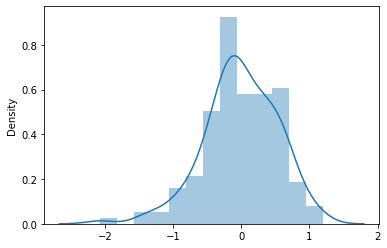

In [85]:
residual = y_test- y_pred
sns.distplot(residual)

In [86]:
abs(residual.mean())

0.007416487467495869

Here the residual mean is 0.0074 hence it indicates it is a good entimator

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


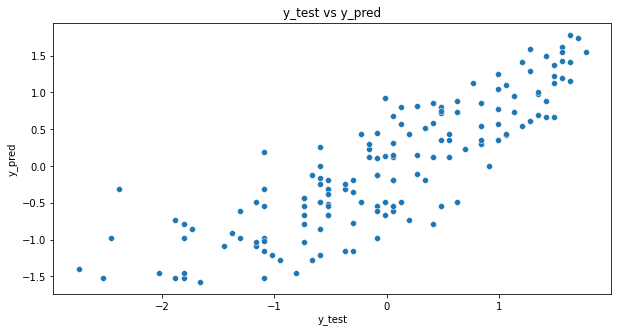

In [89]:
#Check the spread of y_test and y_pred data by scatter plot
fig = plt.figure(figsize=(10,5))
plt.title("y_test vs y_pred")
plt.xlabel("y_test")
plt.ylabel("y_pred")
sns.scatterplot(y_test, y_pred)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


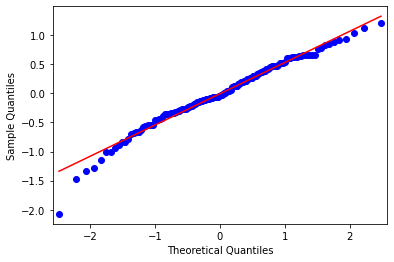

In [98]:
from statsmodels.graphics.gofplots import qqplot

qqplot(residual, line = 's')

plt.show()

data aligns closely to the dotted line indicates a normal distribution

# Model Performance Test

In [102]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
r2 = r2_score(y_test, y_pred)
mea = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

perf_data = [[r2], [mea], [mse], [rmse], [mape]]

#Create pandas data frame 
evaluation_matrix = pd.DataFrame(perf_data, columns=["Scores"], index =['R2', 'Mean Absolute Error', 
                                                                        'Mean Squared Error', 'Root Mean Squared Error',
                                                                           'Mean Absolute Percentage Error'])

evaluation_matrix

,Scores
R2,0.727859
Mean Absolute Error,0.418479
Mean Squared Error,0.289148
Root Mean Squared Error,0.537725
Mean Absolute Percentage Error,2.008603
